# DATA ANALYSIS FOR STEADY STATE SIMULATED DATA (PIPELINE : VVSPL) (Trends : Multiple) (Temp)

### IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as st
import math

### PROVIDE DATA PATHS AND CONVERT TO A DATAFRAME

In [2]:
data_path = 'steady.csv'

df = pd.read_csv(data_path)

print("THIS IS THE FIRST 5 ROWS OF THE DATA\n", df.head())

print("THE NUMBER OF RECORDS ARE : ", len(df))

print("THE",len(df.columns) ,"COLUMNS OF THE DATA ARE : \n", '\n'.join(df.columns))

THIS IS THE FIRST 5 ROWS OF THE DATA
    Seconds        Timestamp_IST  S1-PT-1001A  10-PI-1110  S1-TT-1001A  \
0        0  2025-08-12 16:30:53    81.525495   94.059582    25.463019   
1        5  2025-08-12 16:30:58    81.531672   94.065790    25.453725   
2       10  2025-08-12 16:31:03    81.531354   94.049099    25.470918   
3       15  2025-08-12 16:31:08    81.532418   93.975287    25.455651   
4       20  2025-08-12 16:31:13    81.405468   93.980069    25.451016   

   10-TI-1103  S2-PT-1002A  S2-TT-1002A  20-PT-1312  S2-PT-1002B  ...  \
0   24.994202    16.110440    27.351981    4.998917    16.115449  ...   
1   25.005818    16.106241    27.330663    5.003575    16.107627  ...   
2   24.978400    16.103061    27.338960    5.003476    16.109046  ...   
3   25.025070    16.098854    27.331415    5.002732    16.104863  ...   
4   25.002667    16.122890    27.347044    4.998582    16.113627  ...   

   MOV_3018  11-PT-1203.1  TT-1201B.1  MOV_1206  MOV_3019  S1-PT-1001B.1  \
0       

In [6]:
df.describe()

,Seconds,S1-PT-1001A,10-PI-1110,S1-TT-1001A,10-TI-1103,S2-PT-1002A,S2-TT-1002A,20-PT-1312,S2-PT-1002B,20-TE,...,MOV_3018,11-PT-1203.1,TT-1201B.1,MOV_1206,MOV_3019,S1-PT-1001B.1,S1-TT-1001B.1,S2-PT-1002B.1,S2-TT-1002B.1,20-MOV-1304
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.0,8641.000000,8641.000000,8641.0,8641.0,8641.000000,8641.000000,8641.000000,8641.000000,8641.0
mean,21600.000000,81.516184,94.031277,25.457007,25.000048,16.106358,27.340418,5.001796,16.105734,27.592577,...,1.0,48.453739,26.503230,1.0,1.0,81.515191,25.456798,16.105711,27.340806,1.0
std,12472.930857,0.041010,0.048087,0.013003,0.012626,0.008179,0.013862,0.002547,0.008270,0.014047,...,0.0,0.024706,0.013480,0.0,0.0,0.041519,0.012909,0.008185,0.013977,0.0
min,0.000000,81.368060,93.855469,25.407916,24.951480,16.072948,27.289903,4.991327,16.073253,27.541874,...,1.0,48.367274,26.438872,1.0,1.0,81.361415,25.408205,16.076009,27.285194,1.0
25%,10800.000000,81.488623,93.999383,25.448249,24.991396,16.100892,27.330977,5.000058,16.100118,27.583352,...,1.0,48.437135,26.494351,1.0,1.0,81.487100,25.448155,16.100107,27.331452,1.0
50%,21600.000000,81.516057,94.030973,25.457091,25.000058,16.106265,27.340369,5.001774,16.105751,27.592359,...,1.0,48.453942,26.503162,1.0,1.0,81.515216,25.456808,16.105716,27.340840,1.0
75%,32400.000000,81.543373,94.064645,25.465814,25.008628,16.111900,27.349890,5.003501,16.111339,27.602148,...,1.0,48.470437,26.512123,1.0,1.0,81.543089,25.465590,16.111323,27.350179,1.0
max,43200.000000,81.673162,94.235807,25.510942,25.053641,16.135113,27.395008,5.011922,16.142788,27.644921,...,1.0,48.542302,26.553496,1.0,1.0,81.682941,25.503120,16.136302,27.398760,1.0


### PLOTTING TEMP TRENDS

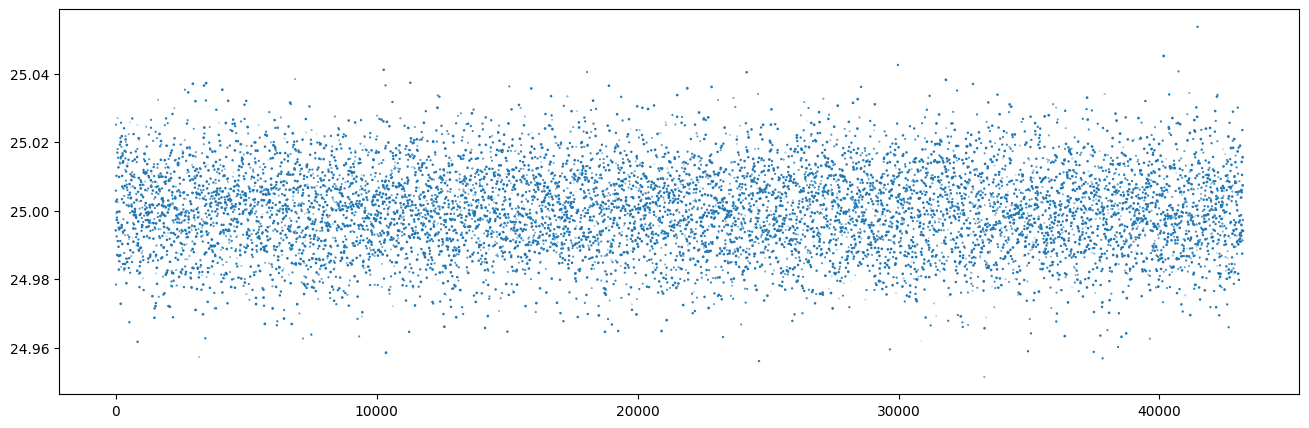

THE STANDARD DEVIATION OF THE Temperature TREND :  0.012624987840814622
THE MEAN OF THE Temperature TREND IS  : 25.00004817654247


In [8]:
trend = '10-TI-1103'

y = df[trend]
x = df['Seconds']
c = np.random.random(len(df))

plt.figure(figsize=(16, 5))
plt.scatter(x, y, c)

plt.show()

print("THE STANDARD DEVIATION OF THE Temperature TREND : ", np.std(y))

print(f"THE MEAN OF THE Temperature TREND IS  : {np.mean(y)}")

## 5. PLOTTING THE 'rolling' TREND

Because, nothing groundbreaking has been derieved from the above plot except a few stats have been derieved form the above trend we'll try plotting the rolling from the mean for every reading

Text(0.5, 1.0, 'ROLLING VAR of SV1')

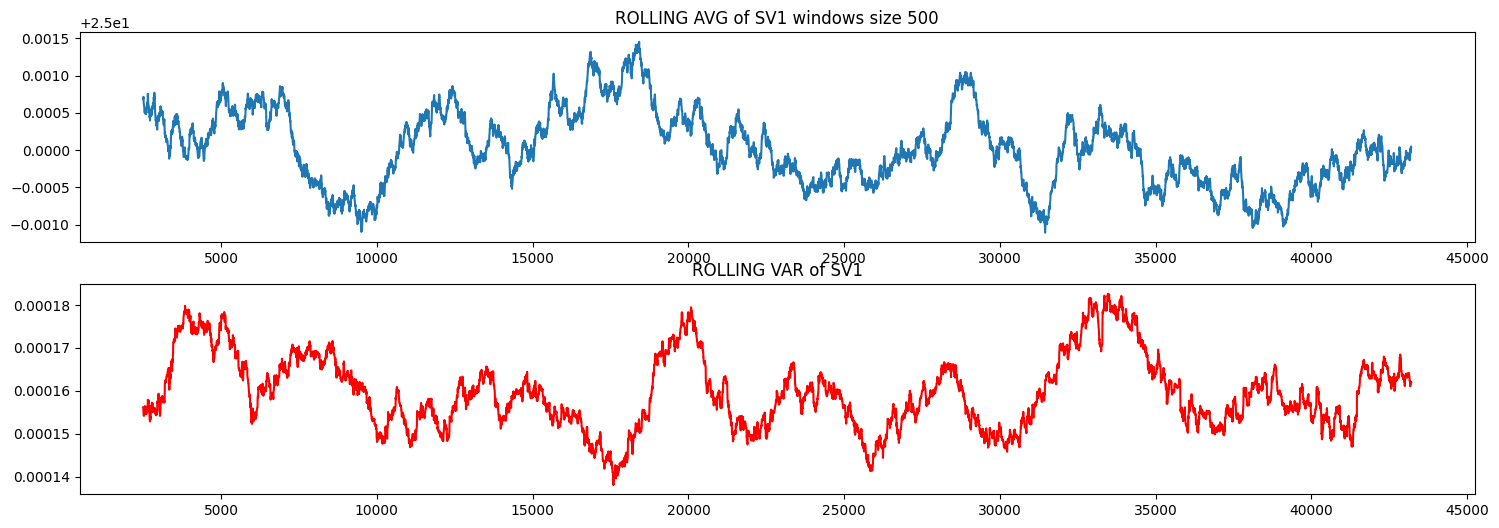

In [52]:
win_size = 500
y_mean = df[trend].rolling(window= win_size).mean()
y_var = df[trend].rolling(window= win_size).var()
x = df['Seconds']

fig, ax = plt.subplots(2, 1, figsize=(18,6)) # 2 row, 1 cols
ax[0].plot(x, y_mean)
ax[0].set_title(f"ROLLING AVG of SV1 windows size {win_size}")
ax[1].plot(x, y_var, color = 'red')
ax[1].set_title("ROLLING VAR of SV1")

### SAME ROLLING TREND BUT WITH INCREASED WINDOW SIZE

Text(0.5, 1.0, 'ROLLING VAR of SV1')

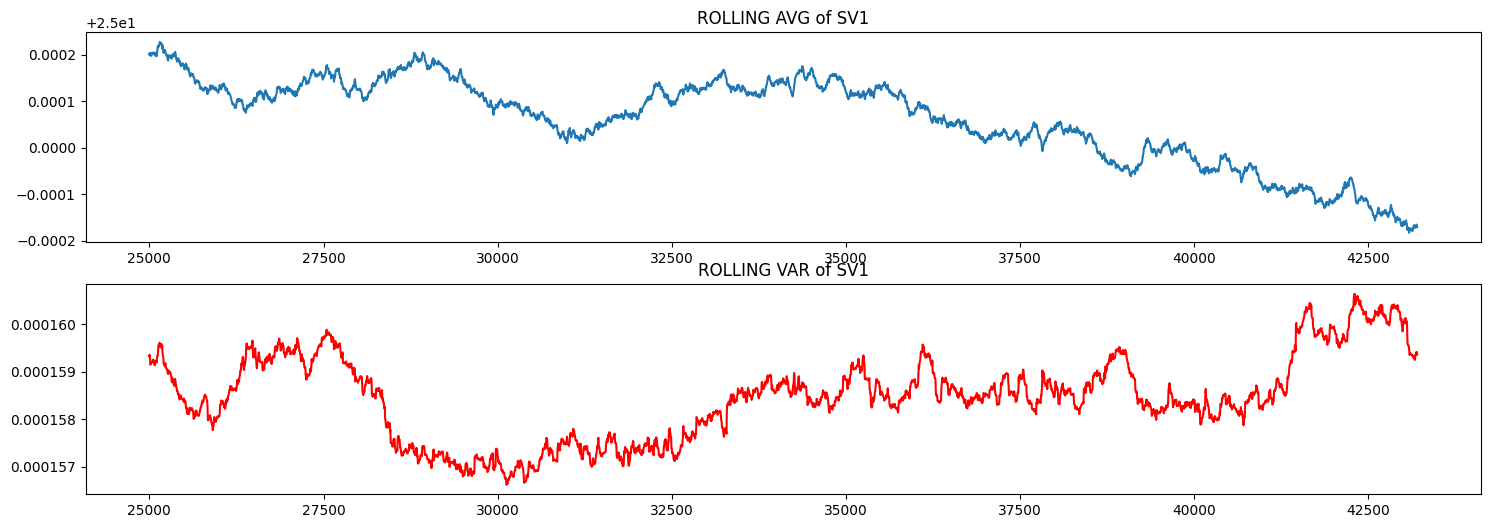

In [49]:
y_mean = df[trend].rolling(window= 5000).mean()
y_var = df[trend].rolling(window= 5000).var()
x = df['Seconds']

fig, ax = plt.subplots(2, 1, figsize=(18,6)) # 2 row, 1 cols
ax[0].plot(x, y_mean)
ax[0].set_title("ROLLING AVG of SV1")
ax[1].plot(x, y_var, color = 'red')
ax[1].set_title("ROLLING VAR of SV1")

### MOVING AVGS (SAME AS ABOVE)

1641

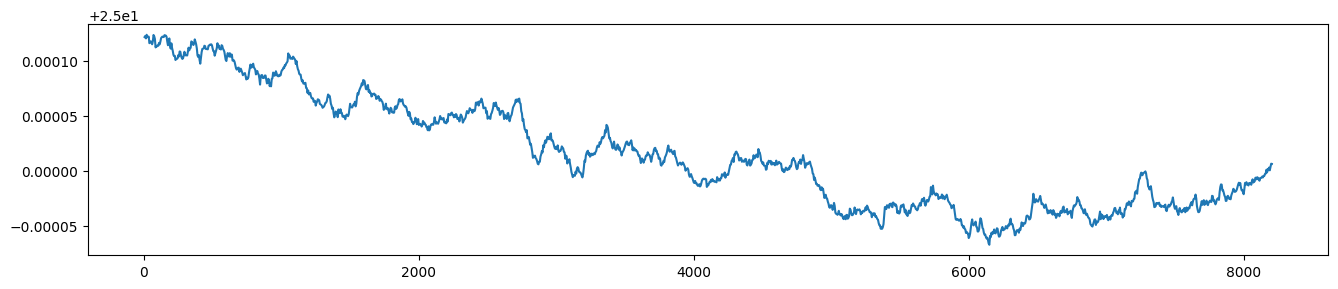

In [12]:
# # Because Df type removes first len of win_size elements, We'll write our own logic so that most data values are not missed when window size is large 
# # (large win size enables better trned analysis)

window_size = 7000

mv_avg = []
time = []
i = 0
while i + window_size < len(y):
    mv_avg.append(y[i : i + window_size].mean())
    time.append((i + 1) * 5 )
    i = i + 1

plt.figure(figsize=(16, 3))
plt.plot(time, mv_avg)

len(mv_avg)


### RATE OF CHNAGE

Text(0, 0, 'MEAN ROC : -0.000000003298')

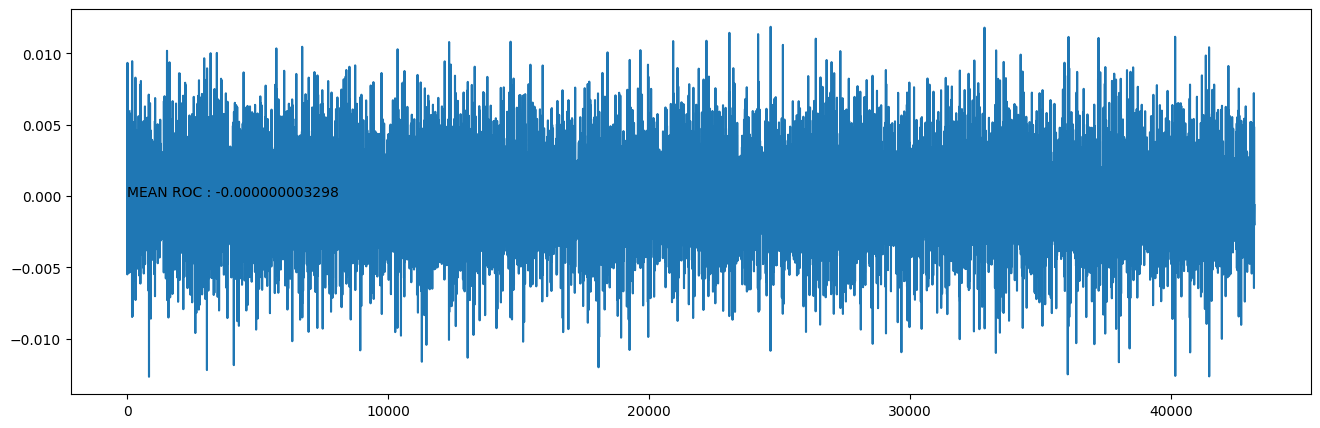

In [60]:
roc = np.diff(y)/5
time = x[1:]

plt.figure(figsize=(16, 5))
plt.plot(time, roc)

plt.text(0, 0, f"MEAN ROC : {np.mean(roc):.12f}")

### SPLINING THE TEMPERATURE TREND

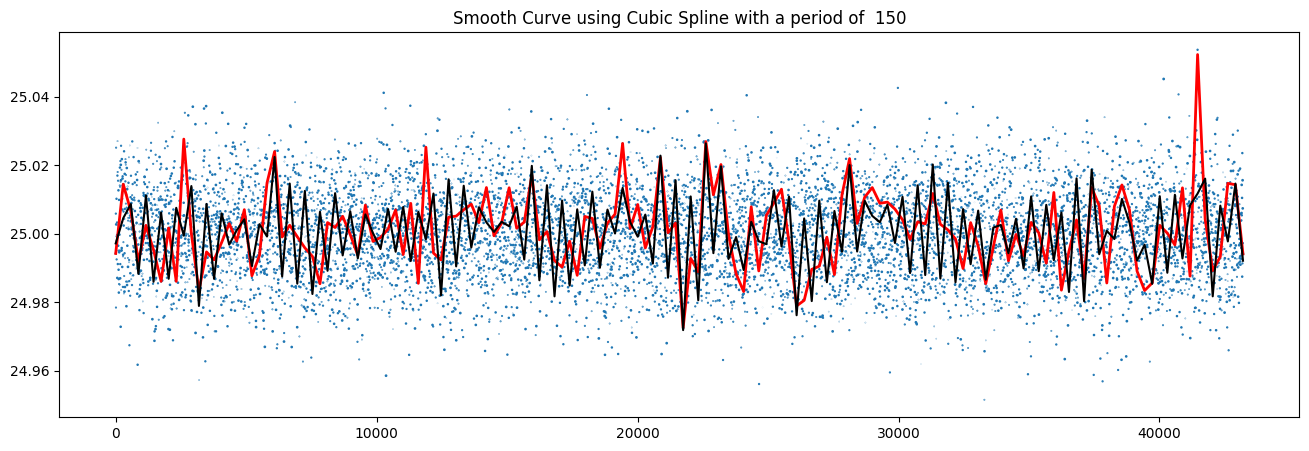

In [44]:
x_spline = np.linspace(x.min(), x.max(), 150)

model = scipy.interpolate.make_interp_spline(x, y)
y_spline = model(x_spline)

checky_sin = np.multiply(np.sqrt(([np.mean(y)] * len(x_spline) ) +  (np.sin(0.9* x_spline) * np.std(y) * 2.3)), np.sqrt(model(x_spline)))

plt.figure(figsize=(16, 5))
plt.plot(x_spline, y_spline, color='red', linewidth=2)
plt.plot(x_spline, checky_sin, color= 'black')
plt.scatter(x, y, c)
plt.title(f'Smooth Curve using Cubic Spline with a period of  {len(x_spline)}')
plt.show()

final_function = np.multiply(np.sqrt(([np.mean(y)] * len(x) ) +  (np.sin(0.9 * x) * np.std(y) * 2.3)), np.sqrt(model(x)))
spline_function = model(x)

In [47]:
print(f"RMSE between spline and custom function: {np.sqrt(np.mean((final_function - spline_function)**2))}")
print(f"RMSE between actual data and custom function: {np.sqrt(np.mean((final_function - y)**2))}")
print(f"RMSE between spline and actual data: {np.sqrt(np.mean((spline_function - y)**2))}")

# Standard deviations
print(f"STD of custom function: {np.std(checky_sin)}")
print(f"STD of spline: {np.std(y_spline)}")
print(f"STD of actual data: {np.std(y)}")

RMSE between spline and custom function: 0.012052342492787626
RMSE between actual data and custom function: 0.01205234249278763
RMSE between spline and actual data: 2.8004311999986556e-15
STD of custom function: 0.011292345407706966
STD of spline: 0.011187001914190831
STD of actual data: 0.012624987840814622


## 2. MULTIVARIATE

In [15]:
# BASED ON Pipeline Lookup of VVSPL

# for pipe VISHAKA_SV1, the sensor at UpPressure is 10-PI-1110 and the DownPressure is S1-PT-1001A
# for pipe SV1_CP4, the sensors at UpPRessure is S1-PT-1001B and the DownPressure is C4-PI-1016
# for pipe VISHAKA_SV1, the sensor at UpTemp is 10-TI-1103 and the DownTemp is S1-TT-1001A
# for pipe IPS1_CP7, the sensor at UpPressure is 11-PT-1203 and the DownPressure is 67-PI-1016
# for SV2_RAJAMUNDRY, S2-PT-1002B, 20-PT-1312
# for SV2_RAJAMUNDRY, S2-TT-1002B, 20-TE-1310
# for CP8_SV2, C8-PI-1016, S2-PT-1002A [NDS] and onlt ,S2-TT-1002A
# SV2_RAJAMUNDRY IS THE LAST STATION AND SV1_VISHKA IS FIRST


### TRENDS OF TEMPERATURE

In [17]:
up_sv1 = df['10-TI-1103']
down_sv1 = df['S1-TT-1001A']

up_sv2 = df['S2-TT-1002B']
down_sv2 = df['20-TE']


### diff_ in up and down for each pipe

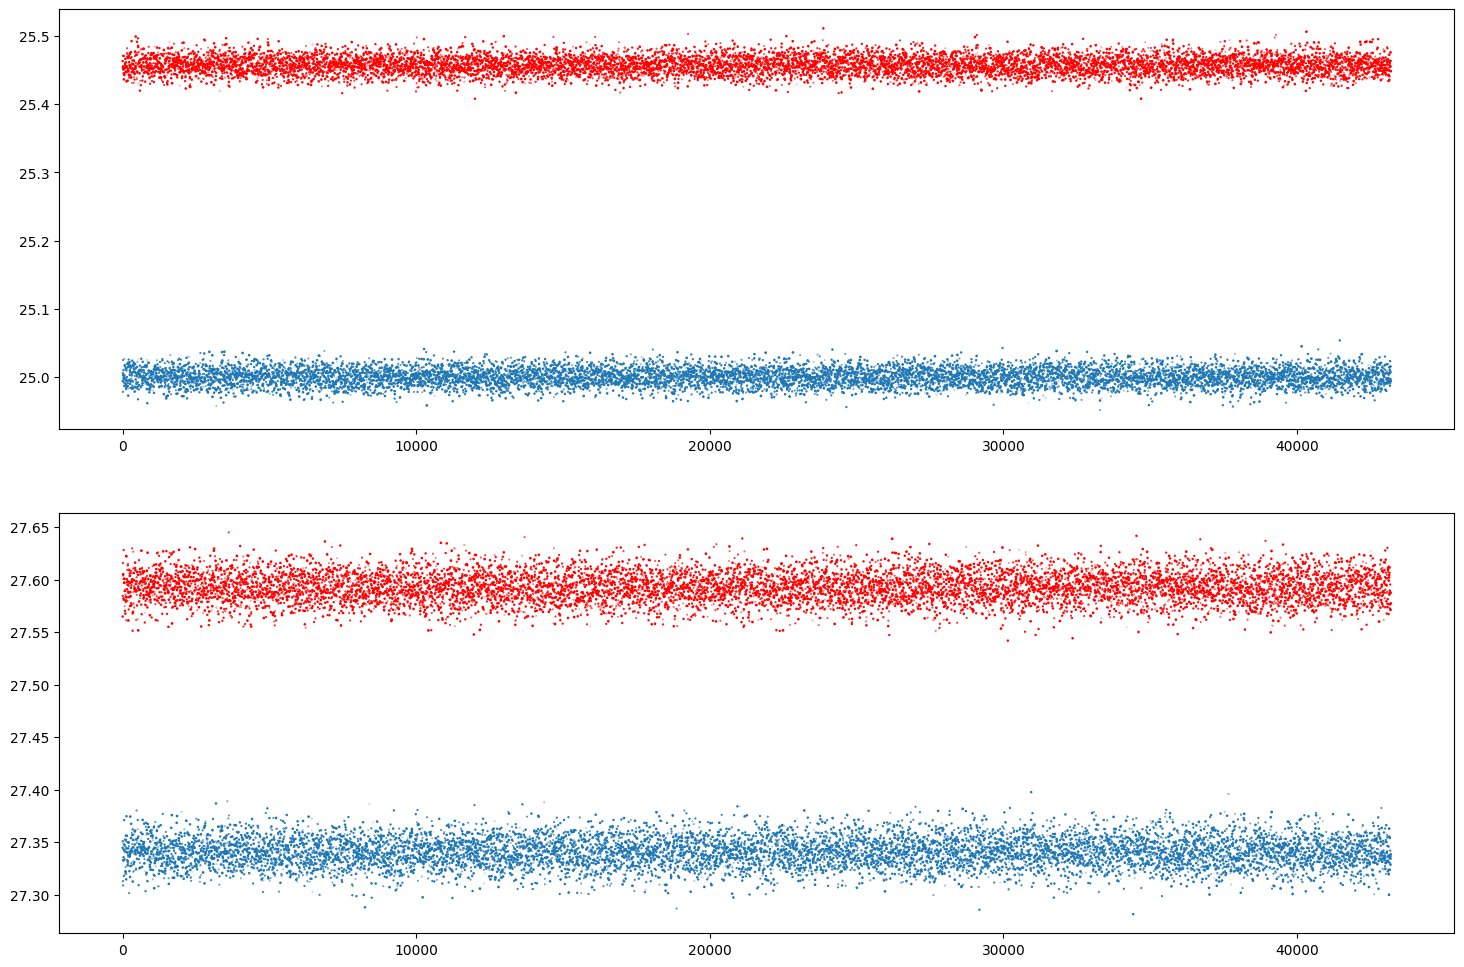

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1, c)
ax[0].scatter(x, down_sv1, c,  color= 'red')

ax[1].scatter(x, up_sv2, c)
ax[1].scatter(x, down_sv2, c, color= 'red')

### ROLLING TRENDS PLOTS

In [39]:
windows_size = 6000
up_sv1_r = df['10-TI-1103'].rolling(window=windows_size).mean()
down_sv1_r = df['S1-TT-1001A'].rolling(window=windows_size).mean()

up_sv2_r = df['S2-TT-1002B'].rolling(window=windows_size).mean()
down_sv2_r = df['20-TE'].rolling(window=windows_size).mean()

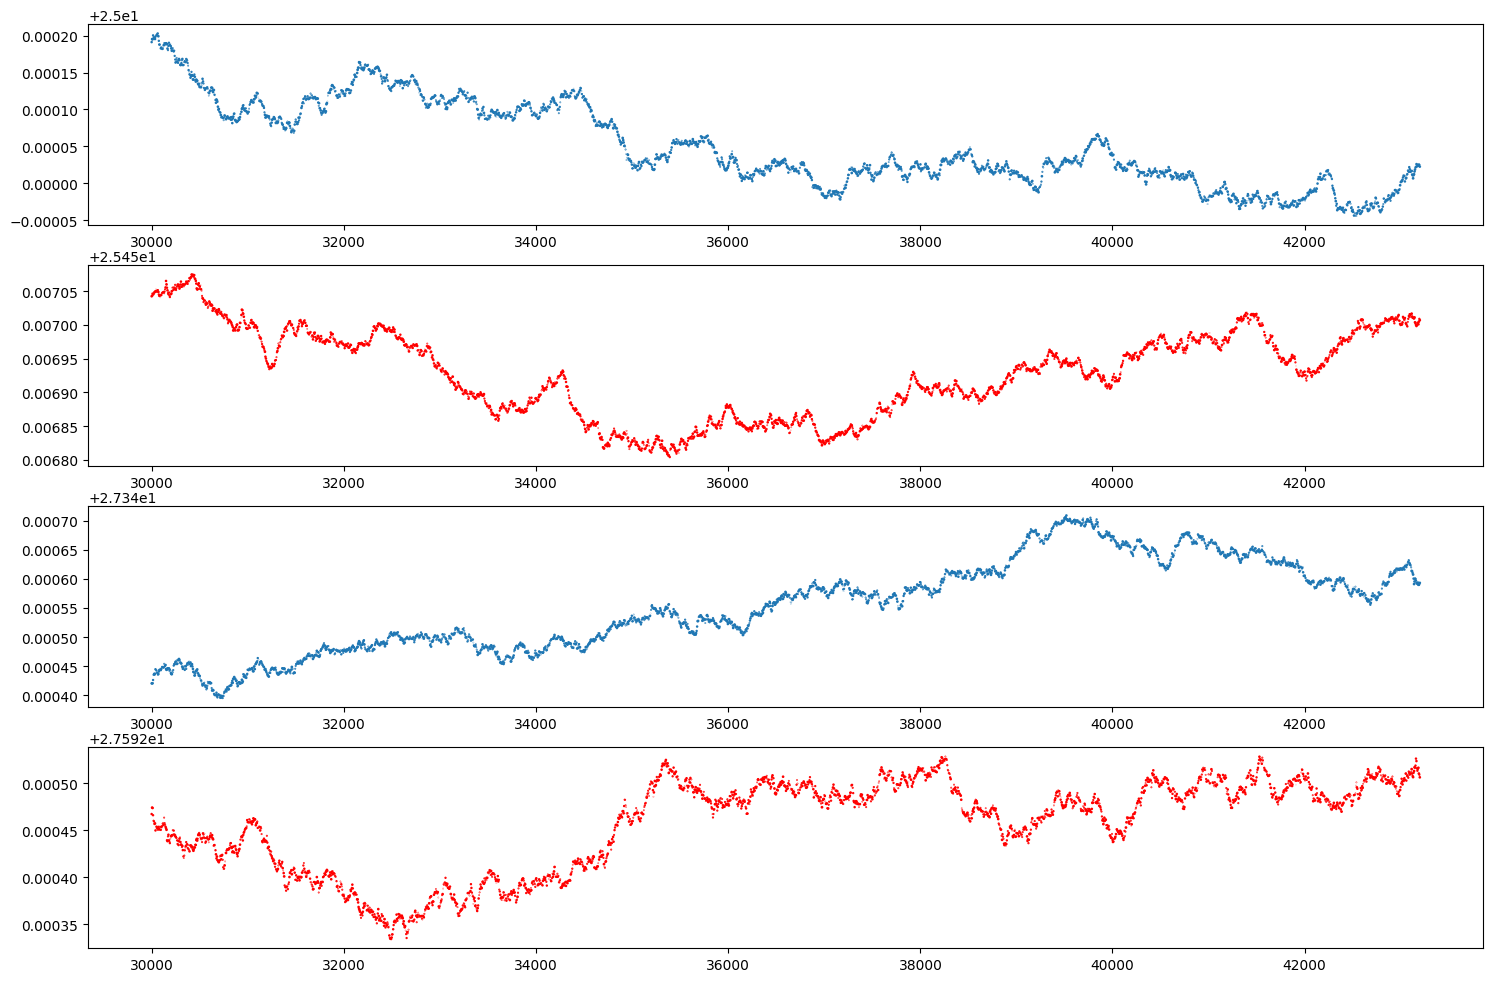

In [40]:
fig, ax = plt.subplots(4, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1_r, c)
ax[1].scatter(x, down_sv1_r, c,  color= 'red')

ax[2].scatter(x, up_sv2_r, c)
ax[3].scatter(x, down_sv2_r, c, color= 'red')

In [42]:

print("DIFFERENCE IN MENS BETWWEN SV_1 UP AND DOWN TEMPERATURES : ", np.mean(up_sv1 - down_sv1))
print("DIFFERENCE IN MENS BETWWEN SV_2 UP AND DOWN TEMPERATURES : ", np.mean(up_sv2 - down_sv2))

DIFFERENCE IN MENS BETWWEN SV_1 UP AND DOWN TEMPERATURES :  -0.45695861345864947
DIFFERENCE IN MENS BETWWEN SV_2 UP AND DOWN TEMPERATURES :  -0.25209099755588776
